In [1]:
# Importing Libraries
import numpy as np
import pandas as pd

# Import dataset
dataset = pd.read_csv('/content/drive/MyDrive/Restaurant_Reviews.tsv', delimiter = '\t')


In [2]:
# library to clean data
import re

# Natural Language Tool Kit
import nltk

nltk.download('stopwords')

# to remove stopword
from nltk.corpus import stopwords

# for Stemming propose
from nltk.stem.porter import PorterStemmer

# Initialize empty array
# to append clean text
corpus = []

# 1000 (reviews) rows to clean
for i in range(0, 1000):

    # column : "Review", row ith
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])

    # convert all cases to lower cases
    review = review.lower()

    # split to array(default delimiter is " ")
    review = review.split()

    # creating PorterStemmer object to
    # take main stem of each word
    ps = PorterStemmer()

    # loop for stemming each word
    # in string array at ith row
    review = [ps.stem(word) for word in review
                if not word in set(stopwords.words('english'))]

    # rejoin all string array elements
    # to create back into a string
    review = ' '.join(review)

    # append each string to create
    # array of clean text
    corpus.append(review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 1500)

# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray()

# y contains answers if review
# is positive or negative
y = dataset.iloc[:, 1].values


In [4]:
# Splitting the dataset into
# the Training set and Test set
from sklearn.model_selection import train_test_split

# experiment with "test_size"
# to get better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# This code is modified by Susobhan Akhuli


In [5]:
# Fitting Random Forest Classification
# to the Training set
from sklearn.ensemble import RandomForestClassifier

# n_estimators can be said as number of
# trees, experiment with n_estimators
# to get better results
model = RandomForestClassifier(n_estimators = 501,
                            criterion = 'entropy')

model.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=501)

In [6]:
# Predicting the Test set results
y_pred = model.predict(X_test)

y_pred


array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0])

In [8]:
# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[97 15]
 [61 77]]
              precision    recall  f1-score   support

           0       0.61      0.87      0.72       112
           1       0.84      0.56      0.67       138

    accuracy                           0.70       250
   macro avg       0.73      0.71      0.69       250
weighted avg       0.74      0.70      0.69       250



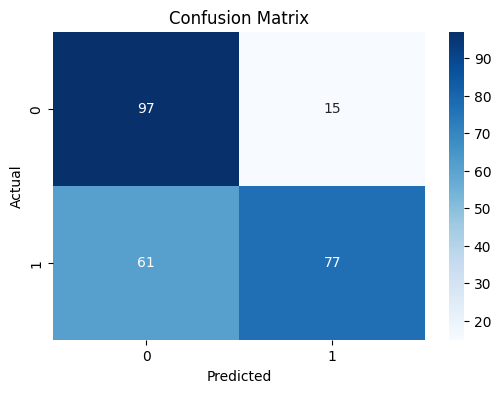

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.87      0.72       112
           1       0.84      0.56      0.67       138

    accuracy                           0.70       250
   macro avg       0.73      0.71      0.69       250
weighted avg       0.74      0.70      0.69       250

Accuracy Score: 0.70


In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")

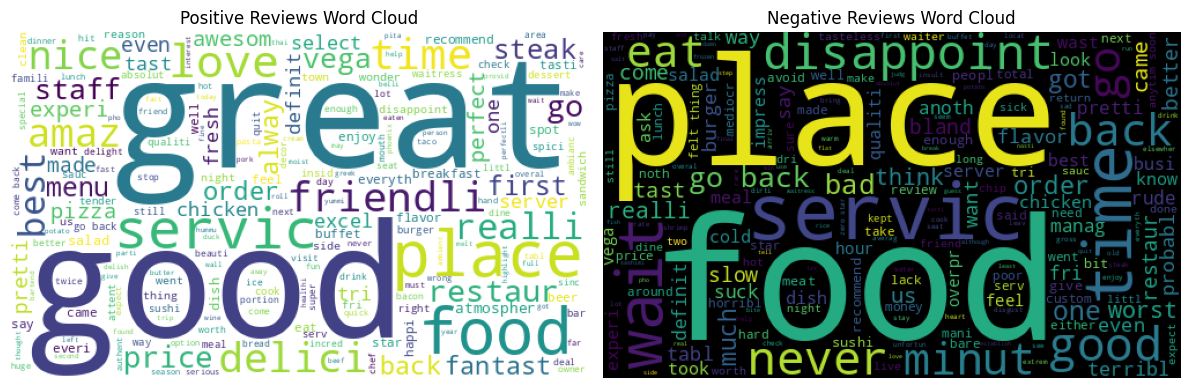

In [10]:
from wordcloud import WordCloud

# Separate positive and negative reviews
positive_reviews = ' '.join([corpus[i] for i in range(len(corpus)) if y[i] == 1])
negative_reviews = ' '.join([corpus[i] for i in range(len(corpus)) if y[i] == 0])

# Generate word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=500, height=300, background_color='white').generate(positive_reviews))
plt.title("Positive Reviews Word Cloud")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=500, height=300, background_color='black').generate(negative_reviews))
plt.title("Negative Reviews Word Cloud")
plt.axis('off')

plt.tight_layout()
plt.show()


<ipython-input-11-66ec0fa2a3e2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_words, palette='viridis')


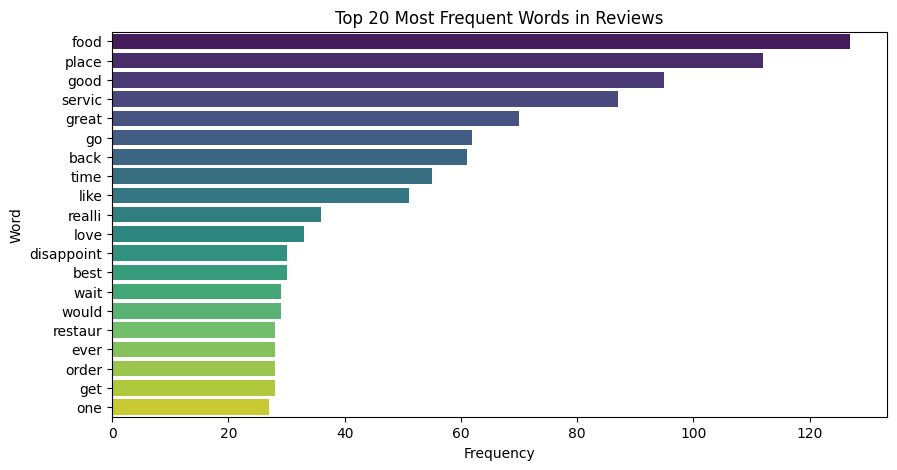

In [11]:
import numpy as np

# Sum word frequencies across all documents
word_freq = np.sum(X, axis=0)
words = cv.get_feature_names_out()

# Create DataFrame
word_freq_df = pd.DataFrame({'Word': words, 'Frequency': word_freq})
top_words = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Word', data=top_words, palette='viridis')
plt.title("Top 20 Most Frequent Words in Reviews")
plt.show()

In [12]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

# Compare Results
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))


Random Forest Accuracy: 0.696
Naive Bayes Accuracy: 0.768


In [13]:
def predict_sentiment(review_text):
    review = re.sub('[^a-zA-Z]', ' ', review_text).lower().split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    final = ' '.join(review)
    vec = cv.transform([final]).toarray()
    result = model.predict(vec)
    prob = model.predict_proba(vec)
    print(f"Prediction: {'Positive' if result[0] == 1 else 'Negative'} (Confidence: {max(prob[0])*100:.2f}%)")

# Try example
predict_sentiment("The food was amazing and the service was excellent!")
predict_sentiment("The place was dirty and the staff were rude.")

Prediction: Positive (Confidence: 97.41%)
Prediction: Negative (Confidence: 55.09%)
